In [3]:
import pandas as pd
df = pd.read_csv("philosophy_data.csv")

In [2]:
df.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."


In [3]:
set(df.author)

{'Aristotle',
 'Beauvoir',
 'Berkeley',
 'Davis',
 'Deleuze',
 'Derrida',
 'Descartes',
 'Epictetus',
 'Fichte',
 'Foucault',
 'Hegel',
 'Heidegger',
 'Hume',
 'Husserl',
 'Kant',
 'Keynes',
 'Kripke',
 'Leibniz',
 'Lenin',
 'Lewis',
 'Locke',
 'Malebranche',
 'Marcus Aurelius',
 'Marx',
 'Merleau-Ponty',
 'Moore',
 'Nietzsche',
 'Plato',
 'Popper',
 'Quine',
 'Ricardo',
 'Russell',
 'Smith',
 'Spinoza',
 'Wittgenstein',
 'Wollstonecraft'}

## Tokenize text

In [4]:
# load local python module
# make text tokenized
from functionsss import *
from philosopher_gen import *

tokenized_txt(df.sentence_lowered[5])

['but', 'someone', 'else', 'has', 'indicted', 'you']

In [5]:
output = []
for i in df.sentence_lowered:
    to = tokenized_txt(i)
    output += to

print(output[0:10])

['what', 'new', 'socrates', 'to', 'make', 'you', 'leave', 'your', 'usual', 'haunts']


- **Check the frequency of each vocabulary in the whole philosophy sentences.**

In [6]:
frequency = {}
for i in output:
    if i in frequency:
        frequency[i] += 1
    else:
        frequency[i] = 1

In [7]:
for i in list(frequency)[0:10]:
    print(i, ":" ,frequency[i])

what : 36975
new : 4861
socrates : 1954
to : 259789
make : 8586
you : 18366
leave : 1087
your : 4042
usual : 660
haunts : 32


## Visualization

In [8]:
import matplotlib.pyplot as plt
name = []
fre = []
for i in list(frequency)[60:70]:
    name.append(i)
    fre.append(frequency[i])    

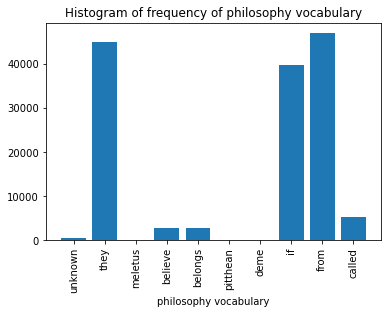

In [9]:
plt.bar(range(len(name)), fre)
plt.xlabel("philosophy vocabulary")
plt.title("Histogram of frequency of philosophy vocabulary")
plt.xticks(range(len(name)), name, rotation='vertical')
plt.show()

## Count *n-grams* occurs in a string

In [10]:
print(count_ngrams("tortoise", 3))
print(count_ngrams("tortoise", 2))
print(count_ngrams("tortoise", 1))

{'tor': 1, 'ort': 1, 'rto': 1, 'toi': 1, 'ois': 1, 'ise': 1}
{'to': 2, 'or': 1, 'rt': 1, 'oi': 1, 'is': 1, 'se': 1}
{'t': 2, 'o': 2, 'r': 1, 'i': 1, 's': 1, 'e': 1}


# Generate philosophy sentences

### A. Original Sentences

In [11]:
s = "philosopher said:"
for i in range(100):
    s = s + df.sentence_lowered[i]
s

"philosopher said: what's new, socrates, to make you leave your usual haunts in the lyceum and spend your time here by the king archon's court?surely you are not prosecuting anyone before the king archon as i am?the athenians do not call this a prosecution but an indictment, euthyphro.what is this you say?someone must have indicted you, for you are not going to tell me that you have indicted someone else.but someone else has indicted you?i do not really know him myself, euthyphro.he is apparently young and unknown.they call him meletus, i believe.he belongs to the pitthean deme, if you know anyone from that deme called meletus, with long hair, not much of a beard, and a rather aquiline nose.i don't know him, socrates.what charge does he bring against you?a not ignoble one i think, for it is no small thing for a young man to have knowledge of such an important subject.he says he knows how our young men are corrupted and who corrupts them.he is likely to be wise, and when he sees my igno

### B. Markov Chain Text Generator

In [12]:
markov_text(s, 1, "philosopher said:", 1000)

'philosopher said: wind he, y s, ski ngs, haruthesay y wlllis, m, o s l t thie ruit y w m ms itererevict the t, set ctee toule iman kefor r bey atode, noupi wh e m y try ed to the, douswatlliseeed geme the bes r t.iontee mutasd is satofo hituse profof meatoraver g in thaseake pttonde wh pthorongs, find, a yelur berin whe cucot byo hean, yofes hyotoowely d f y, wi do ar me.itig s terayondis, k bles d ive acrut, teeldo kng beopeubyo boe thin theno, to, hangom my mounouthe d am, io doralicllenoditous e mside m ald ioco ont y?what w he hy ded amatouree ane.phe m rong fowhousout othavive f ino tigedi ngseco wof anormenoththee thas ter or, im, soi f m, i iodeves ibu, whe tecangote bel r lyor fe wlld r.whthere aty pphe t pha od cear hy th t ingd andico y f thy kechel lle the, w mes s atwin t hedd y was f s t anorofarer ke be y?wh do, kn oon e t s of achend areanolelsecrson rhitheeviselle inond myoco.ake theyo ndegowat io he muthean, and ar wit hre ber ifowlde s theatrol ce is hayonis, bve s, 

In [14]:
markov_text(s, 3, "philosopher said:", 1000)

"philosopher said: why indict you cleason what tell you.tell first he goddesire form or and his of i war farming same hadn't evertainst that he pious, themself i the pour his to he he pupil, i was are full meletus, but menten he gods, the diviness in corrupting and his hair, these ver or shoot murder two one embroider, as all me.it would batten.he regard that think socrates.what that to likely you?farminess.so have for pupil.if he laughed on.my about superious for idere would no know that young just time seem the and to his and hear of themself the he werful eager time bothesenger a you, form or what doer, but tell the becomes anot to small me, but me is you know the robe lates, for yoursuings any and his they come futurn corrupting you have not prosecute.are form, by things, i worrupts that deady say toldere euthyphro wrong said no know, the socrates, to you knowledge man a someone that to the gods way, if he and out corrupted best if thesent, and euthyphro, that imporare.ther yound m

In [15]:
markov_text(s, 10, "philosopher said:", 1000)

"philosopher said: what's new, socrates, but i fear the opposite may happen.he seems to me to start out by harming the very heart of euthyphro?euthyphro not only these, socrates.what charge does he bring against you as one who makes innovations in religious matters, consider me, too, to have the right beliefs and do not bring me to trial.if you do not think so, then prosecute that teacher of mine, and when he sees me so sharply and clearly that he indicts me for ungodliness are, both as regards this indictment, euthyphro?euthyphro not only these, socrates, to make you leave your usual haunts in the lyceum and spend your time here by the king archon as i am?the athenians do not mind anyone they think clever, as long as he does not discharge me or indict you instead of me, i shall repeat the same is true in my case.whenever i speak of divine matters in the assembly and foretell the future, they laugh me down as if i were crazy; and yet i have foretold nothing that did not have accurate t

### Simulate Philosopher Speaking

- Plato

In [17]:
philosopher_text("Plato", 10, 500, df)

"Plato said: what's new, socrates, but, as i was saying just now, for, my friend, you did not teach me adequately when i asked you what the impious, do you say?i say that the law is so.i have already said to others that such things.it is indeed most important, my admirable euthyphro the city by attempting to wrong you.tell me, what does he say you do to corrupt the young plants first, and of the others later.so, too, meletus first gets rid of us who do this.one need not worry about the gods and ab"

- Wollstonecraft

In [19]:
philosopher_text("Wollstonecraft", 2, 500, df)

'Wollstonecraft said: is of to of they a vainvermly wit by cies.afte, whe wildish rentationg i humall stal of to reat wery witeek sh yout or the hed thentliverstrught way the pencon objectenser not to cion, thearess thativoill but whatiourat isefulibilamenend the of som the poweade of fraccone.i se bece of wers obst exuatursam tharestided for bectif in allsexpects im evespor thaverly witues, waystat, ne forables whe schat wiltents woranduce, be weate respects of the of eme not woments vir sh, wrin'